In [1]:
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
n_samples , n_features = iris.data.shape

In [4]:
n_samples

150L

In [5]:
n_features

4L

In [6]:
iris.data[0]

array([ 5.1,  3.5,  1.4,  0.2])

In [7]:
len(iris.target) == n_samples

True

In [8]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
list(iris.target_names)

['setosa', 'versicolor', 'virginica']

In [10]:
X, y = iris.data, iris.target

In [13]:
from sklearn.svm import LinearSVC
clf = LinearSVC()

In [14]:
clf

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='l2', multi_class='ovr', penalty='l2',
     random_state=None, tol=0.0001, verbose=0)

In [15]:
clf = clf.fit(X, y)

clf.coef_

array([[ 0.18423704,  0.45123224, -0.80794264, -0.45070809],
       [ 0.05219378, -0.89239841,  0.40447391, -0.93816473],
       [-0.85071774, -0.98664237,  1.38093549,  1.86532022]])

In [16]:
clf.intercept_

array([ 0.1095632 ,  1.66710231, -1.70978822])

In [17]:
X_new = [[ 5.0,  3.6,  1.3,  0.25]]

clf.predict(X_new)

array([0])

In [18]:
from sklearn.linear_model import LogisticRegression
clf2 = LogisticRegression().fit(X, y)
clf2

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l2', random_state=None, tol=0.0001)

In [19]:
clf2.predict_proba(X_new)

array([[  9.07512928e-01,   9.24770379e-02,   1.00343962e-05]])

This means that the model estimates that the sample in X_new has:

* 90% likelyhood to belong to the ‘setosa’ class
* 9% likelyhood to belong to the ‘versicolor’ class
* 1% likelyhood to belong to the ‘virginica’ class

Of course, the predict method that outputs the label id of the most likely outcome is also available:

### Dimensionality Reduction and Visualization

In [20]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, whiten=True).fit(X)

In [22]:
pca.components_ 

array([[ 0.17650757, -0.04015901,  0.41812992,  0.17516725],
       [-1.33840478, -1.48757227,  0.35831476,  0.15229463]])

In [23]:
pca.explained_variance_ratio_

array([ 0.92461621,  0.05301557])

In [24]:
pca.explained_variance_ratio_.sum()

0.97763177502480314

In [25]:
X_pca = pca.transform(X)

In [26]:
import numpy as np
np.round(X_pca.mean(axis=0), decimals=5)

array([ 0.,  0.])

In [27]:
np.round(X_pca.std(axis=0), decimals=5)

array([ 1.,  1.])

In [28]:
np.round(np.corrcoef(X_pca.T), decimals=5)

array([[ 1.,  0.],
       [ 0.,  1.]])

In [29]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [30]:
import pylab as pl
from itertools import cycle

def plot_PCA_2D(data, target, target_names):
    colors = cycle('rgbcmykw')
    target_ids = range(len(target_names))
    pl.figure()
    for i, c, label in zip(target_ids, colors, target_names):
        pl.scatter(data[target == i, 0], data[target == i, 1],
                   c=c, label=label)
    pl.legend()

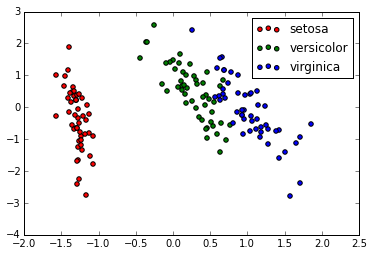

In [31]:
plot_PCA_2D(X_pca, iris.target, iris.target_names)

In [32]:
from sklearn.cluster import KMeans
from numpy.random import RandomState
rng = RandomState(42)

In [33]:
kmeans = KMeans(n_clusters=3, random_state=rng).fit(X_pca)

In [34]:
np.round(kmeans.cluster_centers_, decimals=2)

array([[ 1.02, -0.71],
       [ 0.33,  0.89],
       [-1.29, -0.44]])

In [35]:
kmeans.labels_[:10]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [36]:
kmeans.labels_[-10:]

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

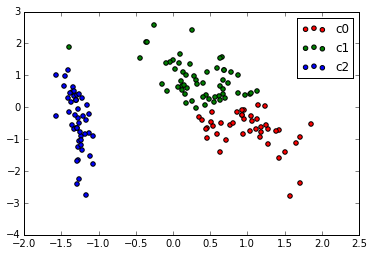

In [42]:
plot_PCA_2D(X_pca, kmeans.labels_, ["c0", "c1", "c2"])

## Cross-Validation on the Iris Dataset

In [43]:
# all of this is taken from the notebook '04_iris_clustering.ipynb'
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

n_samples, n_features = iris.data.shape
print n_samples

150


In [44]:
indices = np.arange(n_samples)
indices[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [45]:
np.random.RandomState(42).shuffle(indices)
indices[:10]

array([ 73,  18, 118,  78,  76,  31,  64, 141,  68,  82], dtype=int64)

In [46]:
X = iris.data[indices]
y = iris.target[indices]

#### We can now split the data using a 2/3 - 1/3 ratio:

In [47]:
split = (n_samples * 2) / 3

X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

X_train.shape

(100L, 4L)

In [51]:
X_test.shape

(50L, 4L)

In [52]:
y_train.shape

(100L,)

In [53]:
y_test.shape

(50L,)

#### We can now re-train a new linear classifier on the training set only:

In [55]:
from sklearn.svm import LinearSVC
clf = LinearSVC().fit(X_train, y_train)

In [56]:
np.mean(clf.predict(X_test) == y_test)

1.0